In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os

### Load and Unpickle dataframes stored in directory

In [2]:
def load_and_unpickle(class_type, directory, subdirectory):
    """
    Description:
    Loads and Unpickles a file from the supplied parameters
    
    Parameter:
    class_type (str): class type to be loaded and unpickled\n
    directory (str): directory within the CWD\n
    subdirectory (str): subdirectory within the directory specified\n
    
    Returns:
    Specified dataframe if found in the directory\n
    None if not found\n
    """
    dir_path = f"{directory}/{subdirectory}"
    filename = f'{class_type}.pkl'
    filepath = os.path.join(dir_path, filename)

    if os.path.exists(filepath):
        df = pd.read_pickle(filepath)
        print(f"Loaded from {subdirectory} for class {class_type}")
        return df
    else:
        print(f"File not found: {filepath}")
        return None

### Add Original Dataframes to their respective arrays

In [3]:
classes = ["Jump", "Run", "Walk", "Squat"]
original_directory = "Original"
clean_directory = "Clean"
training_subdirectory = "Training"
test_subdirectory = "Test"
validation_subdirectory = "Validation"

original_training_df_arr = []
for class_type in classes:
    original_training_df_arr.append(load_and_unpickle(class_type, original_directory, training_subdirectory))

original_test_df_arr = []
for class_type in classes:
    original_test_df_arr.append(load_and_unpickle(class_type, original_directory, test_subdirectory))

original_validation_df_arr = []
for class_type in classes:
    original_validation_df_arr.append(load_and_unpickle(class_type, original_directory, validation_subdirectory))

original_train_df= pd.DataFrame()

for df in original_training_df_arr:
    original_train_df = pd.concat([original_train_df, df], ignore_index=True)


Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


### Add Clean Dataframes to their respective arrays

In [4]:
clean_training_df_arr = []
for class_type in classes:
    clean_training_df_arr.append(load_and_unpickle(class_type, clean_directory, training_subdirectory))

clean_test_df_arr = []
for class_type in classes:
    clean_test_df_arr.append(load_and_unpickle(class_type, clean_directory, test_subdirectory))

clean_validation_df_arr = []
for class_type in classes:
    clean_validation_df_arr.append(load_and_unpickle(class_type, clean_directory, validation_subdirectory))
    
clean_train_df = pd.DataFrame()

for df in clean_training_df_arr:
    clean_train_df = pd.concat([clean_train_df, df], ignore_index=True)

Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


# Original Data

### Train KNN model (Original Data)

In [5]:
# Prepare features and labels for training
X_train = original_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = original_train_df['Class']  # Label column

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_
print(f"Best k (without normalization): {best_k}")
print(f"Accuracy(without normalization): {best_accuracy}")
mean_scores_original = grid_search.cv_results_['mean_test_score']
k_values_original = grid_search.cv_results_['param_n_neighbors'].data

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

Best k (without normalization): 5
Accuracy(without normalization): 0.830606680527928


KNeighborsClassifier()

# Questions

### Make a choice of the range of k-values you will use. Motivate the choice.

A range of 1-31 was chosen so it covers a wide range of k-values. Low range of k-values, 1-5 for example, might lead to overfitting the data. While High range of k-values, 10-31 for example, might lead to underfitting the data. An odd K-value is preferred to avoid ties in classification decisions.

### What is the optimal K-value?

Optimal K-value was found to be 5

### What is the accuracy?

The accuracy of the model is 0.83

### How sensitive is the performance of the model for different k-values?

The model is not very sensitive to different k-values. The difference between the best accuracy (k = 5) and worst accuracy (k = 2) is ~2%. The model is generally stable in terms of accuracy.

### Calculate Accuracy for each test set (Original Test Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (without normalization) for 'Jump' (Original Test Data): 0.8931652289316523
Test set accuracy (without normalization) for 'Run' (Original Test Data): 0.6134122287968442
Test set accuracy (without normalization) for 'Walk' (Original Test Data): 0.7952286282306164
Test set accuracy (without normalization) for 'Squat' (Original Test Data): 0.9323607427055703
Average Accuracy (Original Test Data): 0.8085417071661708


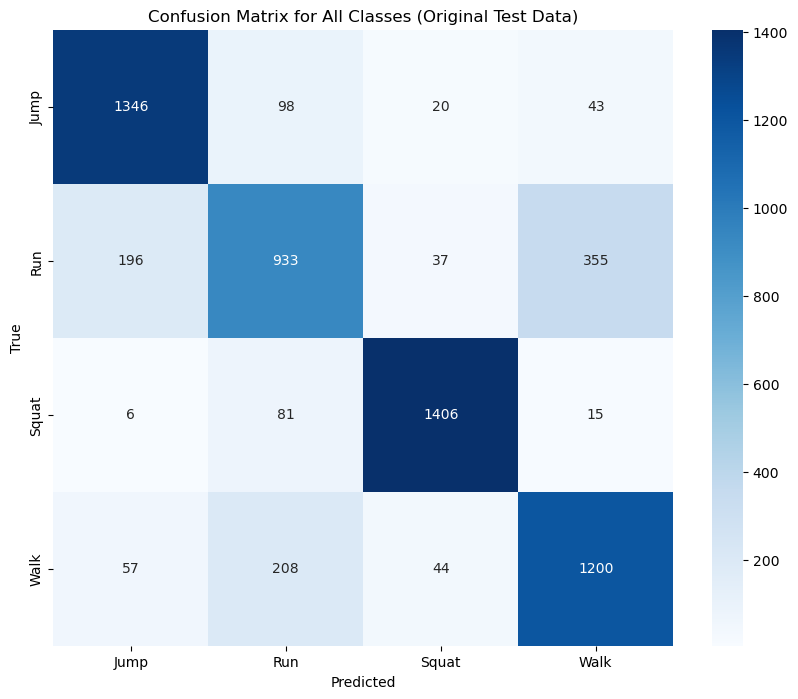

In [6]:
original_test_accuracy_total = 0
y_test_total_org_test = []
y_pred_total_org_test = []
for i in range(4):
    test_df = original_test_df_arr[i]
    X_test = test_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = test_df['Class']  # Label column
    y_pred = final_knn.predict(X_test)
    y_test_total_org_test.extend(y_test)
    y_pred_total_org_test.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracy_total = original_test_accuracy_total + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Original Test Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_test, y_pred_total_org_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Original Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_test_accuracy_total_avg = original_test_accuracy_total / 4
print(f"Average Accuracy (Original Test Data): {original_test_accuracy_total_avg}")

### Plot accuracy vs k-value (Original Test Data)

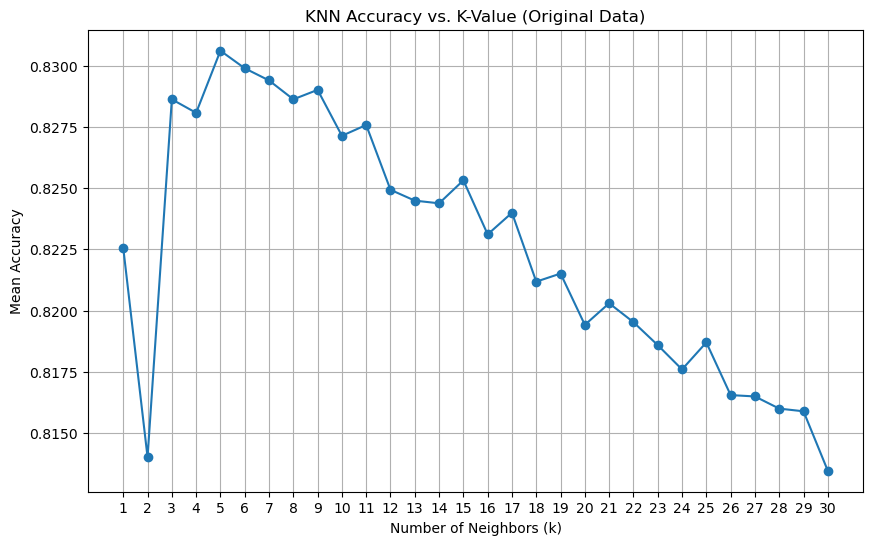

In [7]:
# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_original, mean_scores_original, marker='o')
plt.title('KNN Accuracy vs. K-Value (Original Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values_original)
plt.grid()
plt.show()

### Calculate Accuracy for each test set (Original Validation Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (without normalization) for 'Jump' (Original Validation Data): 0.7937665782493368
Test set accuracy (without normalization) for 'Run' (Original Validation Data): 0.6730263157894737
Test set accuracy (without normalization) for 'Walk' (Original Validation Data): 0.8144466534128562
Test set accuracy (without normalization) for 'Squat' (Original Validation Data): 0.42838196286472147
Average Accuracy (Original Validation Data): 0.677405377579097


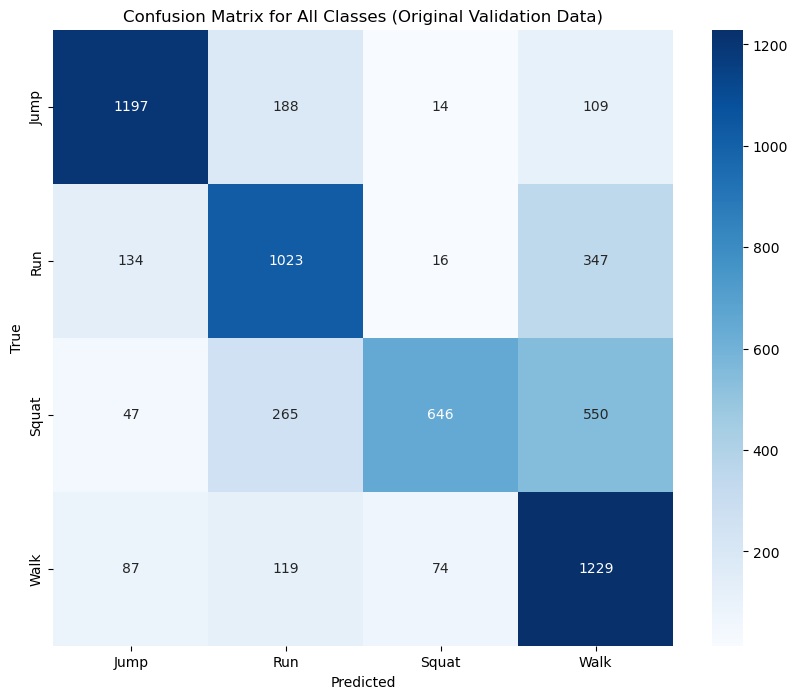

In [8]:
original_validation_accuracy = 0
y_test_total_org_validation = []
y_pred_total_org_validation = []
for i in range(4):
    validation_df = original_validation_df_arr[i]
    X_test = validation_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = validation_df['Class']  # Label column
    y_pred = final_knn.predict(X_test)
    y_test_total_org_validation.extend(y_test)
    y_pred_total_org_validation.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    original_validation_accuracy = original_validation_accuracy + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Original Validation Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_validation, y_pred_total_org_validation)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Original Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_validation_accuracy_avg = original_validation_accuracy / 4
print(f"Average Accuracy (Original Validation Data): {original_validation_accuracy_avg}")

# Question

### Explain the difference between the accuracy for the validation set and the test set.

The test set data had higher average accuracy than the validation set data. This is mostly due to the quality of the data collection of the last sample.

A significant drop in "Squat" and "Jump" occured in the validation (93.2% to 42.8%) and (89.3% to 79.3%) respectively. While "Run" and "Walk" improved slightly (61.3% to 67.3%) and (79.5% to 81.4%) respectively.

### Explain the result in the confusion matrix

Test Set:

Jump and Squat had great results showing very little similarities to other classes.

Walk had good results but a small number of samples were predicted to be Run.

Run had the worst result of all classes. Many of the samples were predicted to either be Jump or Walk. This is due to the data acquisition method.

Validation Set:

Contrary to the test set, Jump and Walk had great results showing little similarities to other classes.

Run had good results where a small number of samples were predicted to be Walk.

Squat had the worst results, predicting more than half the samples to be other classes, specifically Walk. This is due to the poor data acquisition method.

# Clean Data

### Train KNN model (Clean Data)

In [9]:
# Prepare features and labels for training
X_train = clean_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = clean_train_df['Class']  # Label column

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_
mean_scores_clean = grid_search.cv_results_['mean_test_score']
k_values_clean = grid_search.cv_results_['param_n_neighbors'].data
print(f"Best k (without normalization): {best_k}")
print(f"Best Accuracy (without normalziation: {best_accuracy})")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

Best k (without normalization): 5
Best Accuracy (without normalziation: 0.8620305650223635)


KNeighborsClassifier()

# Questions

### Make a choice of the number of subsets that you use for your crossvalidation. Motivate your choice.

An initial model was trained with 5 crossvalidations, which resulted in a similar accuracy. A better k-value was realized with 10 crossvalidations. So 10 crossvalidations were chosen.

### Make a choice of the range of k-values you will use. Motivate the choice.

A range of 1-31 was chosen so it covers a wide range of k-values. Low range of k-values, 1-5 for example, might lead to overfitting the data. While High range of k-values, 10-31 for example, might lead to underfitting the data. An odd K-value is preferred to avoid ties in classification decisions.

### What is the optimal K-value?

Optimal K-value was found to be 5

### What is the accuracy?

The accuracy of the model is 0.86

### How sensitive is the performance of the model for different k-values?

The model is not very sensitive to different k-values. The difference between the best accuracy (k = 5) and worst accuracy (k = 30) is ~2.5%. The model is generally stable in terms of accuracy.

### Calculate Accuracy for each test set (Clean Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (without normalization) for 'Jump' (Clean Data): 0.9005355776587605
Test set accuracy (without normalization) for 'Run' (Clean Data): 0.6267978803936411
Test set accuracy (without normalization) for 'Walk' (Clean Data): 0.8273491214667685
Test set accuracy (without normalization) for 'Squat' (Clean Data): 0.9831804281345565
Average Accuracy (Clean Test Data): 0.8344657519134316


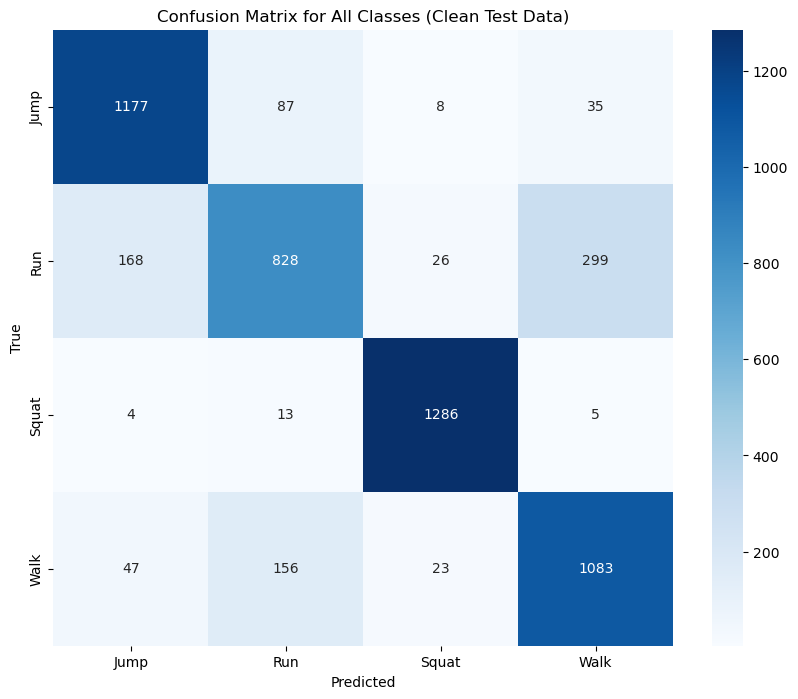

In [10]:
clean_test_accuracy = 0
y_test_total_test_clean = []
y_pred_total_test_clean = []

for i in range(4):
    test_df = clean_test_df_arr[i]
    X_test = clean_test_df_arr[i][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = test_df['Class']  # Label column
    y_pred = final_knn.predict(X_test)
    y_test_total_test_clean.extend(y_test)
    y_pred_total_test_clean.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    clean_test_accuracy = clean_test_accuracy + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Clean Data): {accuracy}")

cm = confusion_matrix(y_test_total_test_clean, y_pred_total_test_clean)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Clean Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
clean_test_accuracy_avg = clean_test_accuracy / 4
print(f"Average Accuracy (Clean Test Data): {clean_test_accuracy_avg}")

Test set accuracy (without normalization) for 'Jump' (Clean Validation Data): 0.8348623853211009
Test set accuracy (without normalization) for 'Run' (Clean Validation Data): 0.6992424242424242
Test set accuracy (without normalization) for 'Walk' (Clean Validation Data): 0.813598166539343
Test set accuracy (without normalization) for 'Squat' (Clean Validation Data): 0.49923547400611623
Average Accuracy (Clean Validation Data): 0.7117346125272461


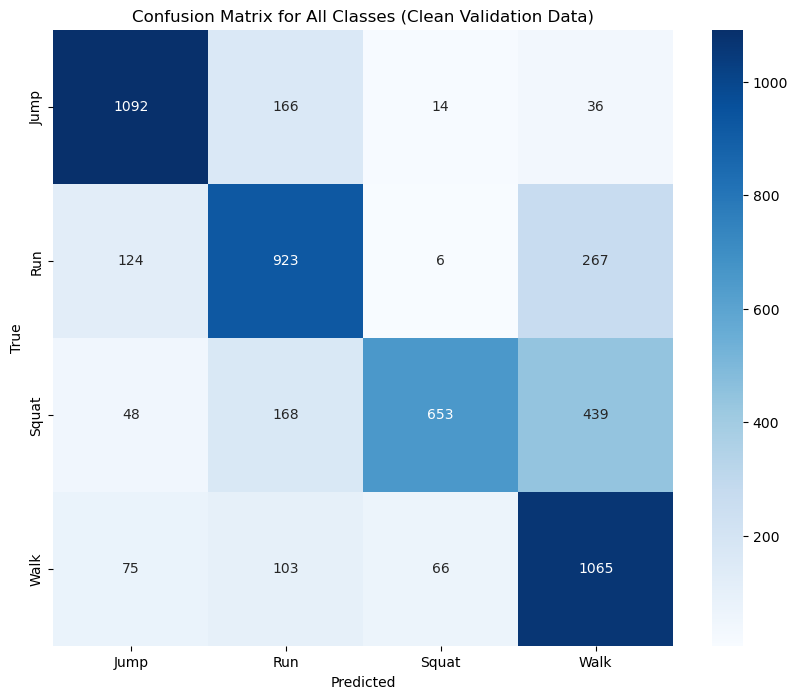

In [11]:
clean_validation_accuracy = 0
y_test_total_org_validation_clean = []
y_pred_total_org_validation_clean = []
for i in range(4):
    test_df = clean_validation_df_arr[i]
    X_test = clean_validation_df_arr[i][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = test_df['Class']  # Label column
    y_pred = final_knn.predict(X_test)
    y_test_total_org_validation_clean.extend(y_test)
    y_pred_total_org_validation_clean.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    clean_validation_accuracy = clean_validation_accuracy + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Clean Validation Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_validation_clean, y_pred_total_org_validation_clean)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_knn.classes_, yticklabels=final_knn.classes_)
plt.title('Confusion Matrix for All Classes (Clean Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
clean_validation_accuracy_avg = clean_validation_accuracy / 4
print(f"Average Accuracy (Clean Validation Data): {clean_validation_accuracy_avg}")

### Plot Accuracy vs k-value (Clean data)

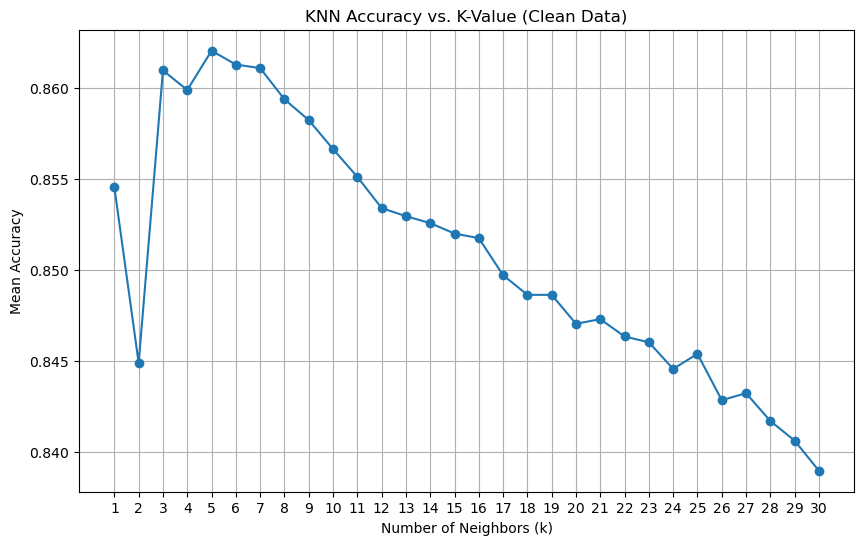

In [12]:
# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_clean, mean_scores_clean, marker='o')
plt.title('KNN Accuracy vs. K-Value (Clean Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values_clean)
plt.grid()
plt.show()

# Questions

### Explain the difference between the accuracy for the validation set and the test set.

The test set data had higher average accuracy than the validation set data. This is mostly due to the quality of the data collection of the last sample.

A significant drop in "Squat" and "Jump" occured in the validation (98.3% to 49.9%) and (90% to 83.4%) respectively. "Walk" worsened slightly (82.7% to 81.3%). While "Run" slightly improved (62.7% to 69.9%)

### Explain the result in the confusion matrix

Test Set:

Jump, Walk and Squat had great results showing very little similarities to other classes.

Run had the worst result of all classes. Many of the samples were predicted to either be Jump or Walk. This is due to the data acquisition method.

Validation Set:

Jump and Walk had great results showing little similarities to other classes.

Run had good results where a small number of samples were predicted to be Walk.

Squat had the worst results, predicting almost half the samples to be other classes, specifically Walk. This is due to the poor data acquisition method.